In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing all the essential libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv')

# **Exploratory Data Analysis (EDA)**

In [4]:
df.sample(5)

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
135573,210918,7302081916,2020.0,infiniti,q50 3.0t sport sedan 4d,good,6 cylinders,gas,23440.0,clean,other,rwd,NaN,sedan,blue,mn,44.010000,-92.470000,2021-04-05T10:41:11-0500,32590
270577,323994,7312441682,2018.0,ford,f-150,NaN,NaN,gas,44654.0,clean,automatic,4wd,NaN,pickup,white,pa,40.854573,-74.120219,2021-04-25T14:37:57-0400,0
242467,103708,7316880470,2007.0,hyundai,tucson,fair,6 cylinders,gas,207468.0,clean,automatic,fwd,mid-size,SUV,grey,fl,30.569430,-87.265520,2021-05-04T14:15:30-0500,1200
152400,221178,7313398866,2018.0,jeep,renegade upland edition,NaN,4 cylinders,gas,41651.0,clean,automatic,4wd,NaN,SUV,NaN,mt,47.696062,-116.781406,2021-04-27T11:07:56-0600,18498
195225,66036,7306054791,2019.0,hyundai,veloster 2.0 premium,good,NaN,gas,17787.0,clean,other,fwd,NaN,coupe,white,ca,33.786500,-84.445400,2021-04-13T03:30:45-0700,20990


In [5]:
df.shape

(290129, 20)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date', 'price'],
      dtype='object')

**Checking total missing values**

In [7]:
df.isna().sum()

Unnamed: 0           0
id                   0
year                 0
manufacturer     11342
model                0
condition       116104
cylinders       119300
fuel              1453
odometer             0
title_status      5066
transmission         0
drive            88087
size            207684
type             62596
paint_color      87113
state                0
lat               4403
long              4403
posting_date         0
price                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

# **Data Cleaning**

**Extracting important features (Feature Selection)**

In [9]:
df.drop(['id', 'Unnamed: 0', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True)

**Handling missing values**

In [10]:
df.isna().sum()/df.shape[0]*100

year             0.000000
manufacturer     3.909296
model            0.000000
condition       40.018061
cylinders       41.119640
fuel             0.500812
odometer         0.000000
title_status     1.746120
transmission     0.000000
drive           30.361322
type            21.575230
paint_color     30.025609
price            0.000000
dtype: float64

**We can see that "year", "manufacturer", "model", and "odometer" column has less than 5% of null values. So we can simply drop those rows which have null values in these two columns.**

In [11]:
df = df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

**For all the missing values in other columns, we have just converted them in to a new category, "unknown"**

In [12]:
df.fillna('unknown', inplace=True)

**Handling duplicated values**

In [13]:
df.duplicated().sum()

104795

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(173992, 13)

**Categorical data cleaning**

In [16]:
manufacturer_values = df['manufacturer'].value_counts()

In [17]:
print(manufacturer_values)

ford               30054
chevrolet          23208
toyota             15488
honda              10682
nissan              8982
jeep                8505
gmc                 6572
ram                 6301
dodge               5971
bmw                 5713
mercedes-benz       4791
hyundai             4716
subaru              4709
volkswagen          4084
kia                 3723
lexus               3246
chrysler            2911
cadillac            2839
audi                2736
mazda               2395
buick               2331
acura               1976
infiniti            1724
lincoln             1502
volvo               1343
pontiac             1237
mitsubishi          1206
mini                1028
rover                792
porsche              652
mercury              613
saturn               553
jaguar               543
fiat                 313
tesla                225
alfa-romeo           175
harley-davidson       55
ferrari               38
datsun                36
aston-martin          17


In [18]:
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [20]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'others')

In [21]:
for i in df.columns:
    print(i, len(df[i].value_counts().index))

year 104
manufacturer 21
model 51
condition 7
cylinders 9
fuel 6
odometer 84767
title_status 7
transmission 3
drive 4
type 14
paint_color 13
price 13137


**Numerical Data Cleaning**

In [22]:
df.describe()

,year,odometer,price
count,173992.000000,1.739920e+05,1.739920e+05
mean,2010.187555,1.084867e+05,7.208073e+04
std,9.576491,2.165069e+05,1.238580e+07
min,1900.000000,0.000000e+00,0.000000e+00
25%,2007.000000,5.145975e+04,4.995000e+03
50%,2012.000000,9.890900e+04,1.050000e+04
75%,2016.000000,1.439505e+05,1.999900e+04
max,2022.000000,1.000000e+07,3.736929e+09


**Our dataset have lots of outliers. Outliers reduces the accuracy of a model. We have to detect outliers and remove them.**

In [23]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25

In [24]:
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['price'].quantile(0.15)

In [25]:
new_df = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]

In [26]:
odometer_percentile75 = df['odometer'].quantile(0.75)
odometer_percentile25 = df['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = df['odometer'].quantile(0.05)

In [27]:
new_df = new_df[(new_df['odometer'] < odometer_upper_limit) & (new_df['odometer'] > odometer_lower_limit)]

In [28]:
new_df.shape

(133332, 13)

# **Feature Engineering**

In [29]:
new_df.sample(5)

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
220728,2005.0,ford,escape,unknown,unknown,gas,123589.0,clean,other,unknown,unknown,unknown,4450
50885,2002.0,audi,others,excellent,4 cylinders,gas,114000.0,clean,manual,4wd,sedan,grey,5995
165350,2016.0,chevrolet,others,excellent,6 cylinders,gas,134865.0,clean,automatic,4wd,truck,red,18699
60369,2009.0,honda,civic,unknown,unknown,gas,192295.0,clean,automatic,unknown,other,unknown,7995
62918,2011.0,audi,others,good,4 cylinders,gas,95380.0,clean,automatic,unknown,coupe,blue,3500


In [30]:
new_df['odometer'] = new_df['odometer'].astype(int)

In [31]:
new_df['year'] = new_df['year'].astype(int)

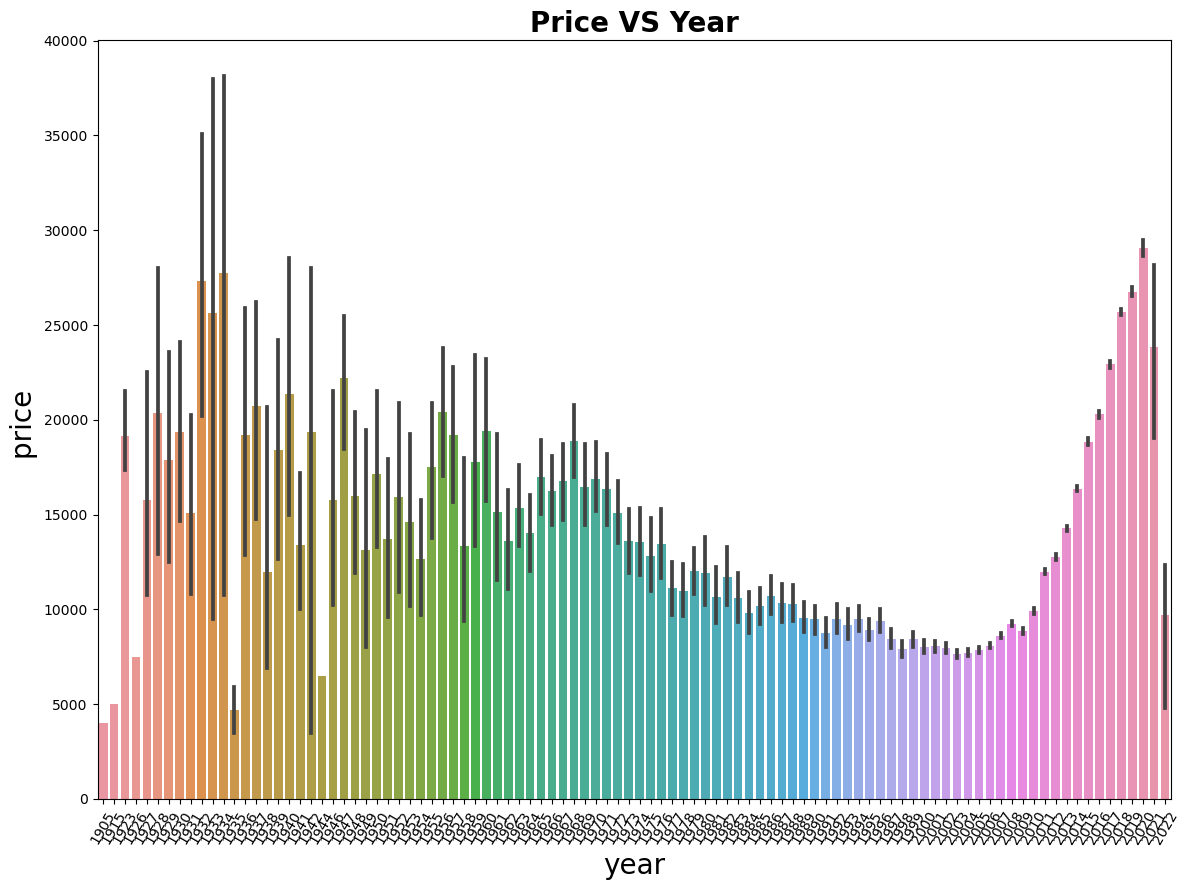

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=new_df['price'],x=new_df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()

**We can see the car data before 1996 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996**

In [33]:
new_df = new_df[new_df['year'] > 1996]
new_df.shape

(127452, 13)

In [34]:
new_df['car_age'] = 2022 - new_df['year']
new_df.drop(['year'], axis = 1, inplace = True)
new_df.describe()

,odometer,price,car_age
count,127452.000000,127452.000000,127452.000000
mean,107395.390869,14782.161622,10.482346
std,55597.834227,9501.716942,5.080284
min,10449.000000,2962.000000,0.000000
25%,64577.750000,6995.000000,6.000000
50%,104627.500000,12000.000000,10.000000
75%,145035.500000,19998.000000,14.000000
max,282650.000000,42500.000000,25.000000


# **Data Visualization**

In [35]:
sample_data = new_df.sample(100)

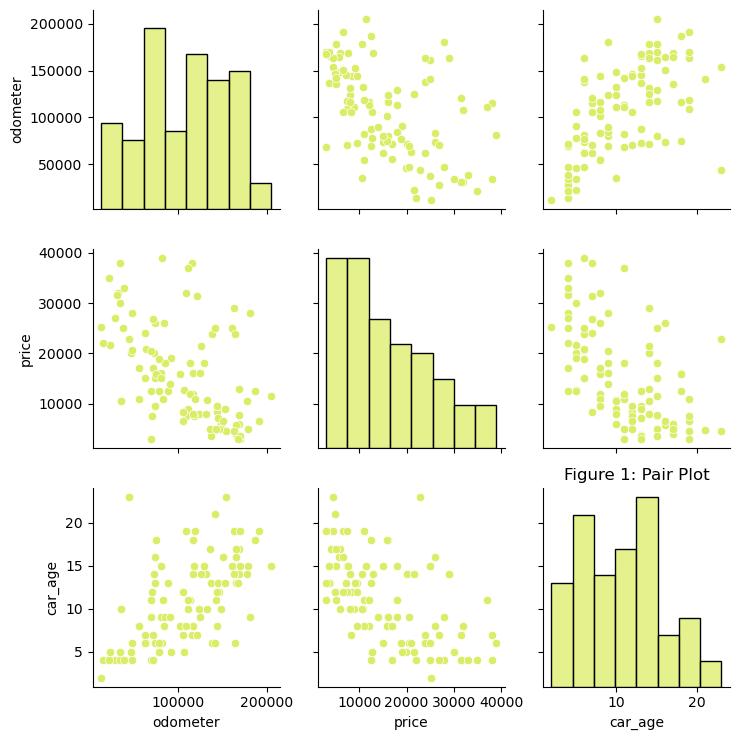

In [36]:
sns.pairplot(sample_data)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()

<AxesSubplot:>

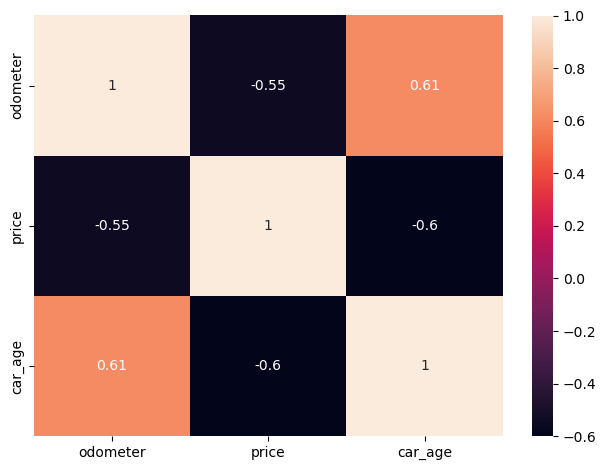

In [37]:
sns.heatmap(new_df.corr(), annot=True)

C:\Users\emana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


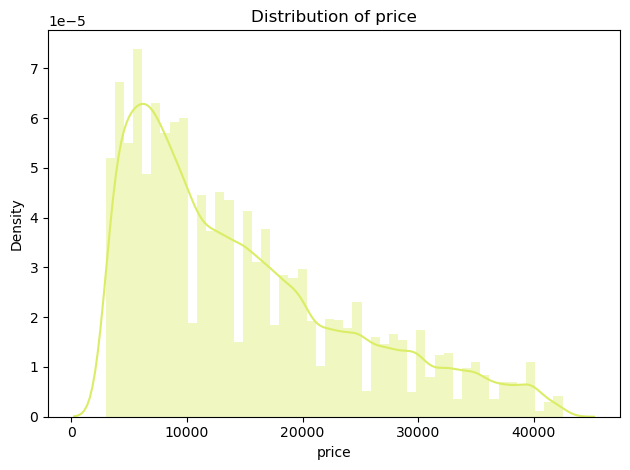

In [38]:
sns.distplot(new_df.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

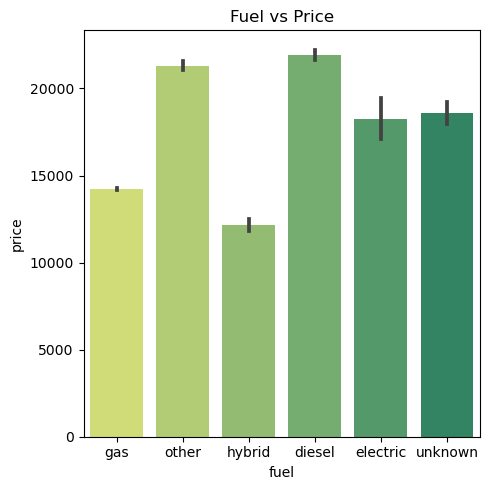

In [39]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=new_df,ax=axs)
axs.set_title('Fuel vs Price')

plt.savefig('Insight-Figure-1',dpi=None)
plt.show()

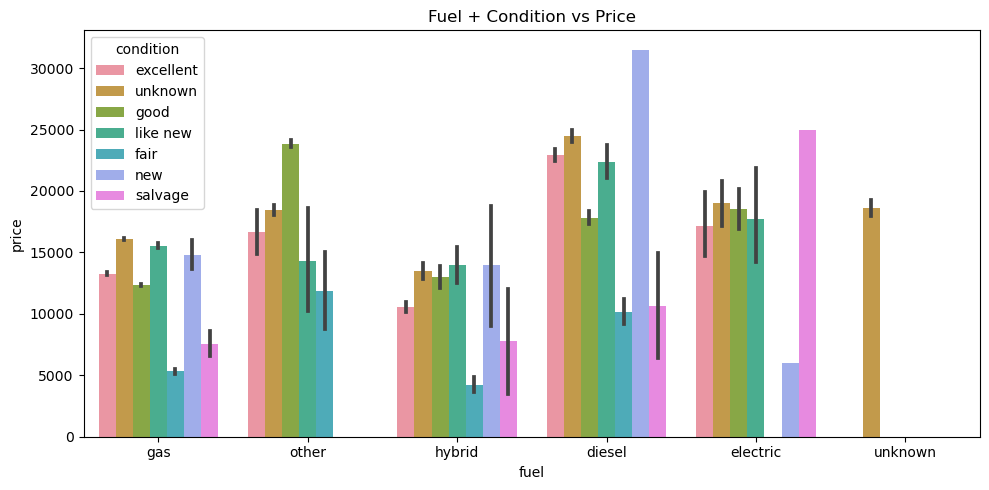

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=new_df)
plt.title('Fuel + Condition vs Price')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

# **Data Preprocessing**

In [41]:
new_df.columns

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'price',
       'car_age'],
      dtype='object')

In [42]:
final_df = new_df.copy()

**Creating encoder and implimenting them into pipeline**

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
pipe_categorical = Pipeline(
    steps = [('ordinal_encoder', OrdinalEncoder(categories = [[ 'salvage', 'fair', 'unknown', 'good', 'excellent', 'like new', 'new']])),
             ('one_hot_encoder', OneHotEncoder(sparse = False, drop = 'first'))]
)

In [45]:
pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)

In [46]:
column_transformer = ColumnTransformer(transformers = [
    ('condition_pipe_trans', pipe_categorical['ordinal_encoder'], ['condition']),
    ('categorical_pipe_trans', pipe_categorical['one_hot_encoder'], ['model', 'manufacturer', 'fuel', 'cylinders','title_status', 'transmission', 'drive', 'type', 'paint_color']),
    ('numerical_pipe_trans', pipe_numerical, ['odometer'])
])

**Train-test-split**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['price'], axis = 1), final_df['price'], random_state = 42, test_size = .2)

In [49]:
X_train_tnf = column_transformer.fit_transform(X_train)

In [50]:
X_test_tnf = column_transformer.transform(X_test)

In [51]:
print(pd.DataFrame(X_train_tnf).shape)
print(pd.DataFrame(X_test_tnf).shape)

(101961, 121)
(25491, 121)


# **Model Training**

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [53]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

#dataframe that store the performance of each model
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

**Linear Regression**

In [54]:
LR = LinearRegression()
LR.fit(X_train_tnf, y_train)
y_pred = LR.predict(X_test_tnf)

In [55]:
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.5964
Mean squared error:  36036385.43
Mean absolute error:  4589.26
Root mean squared error:  6003.03


**Ridge Regression**

In [56]:
RR = Ridge(alpha=20.336, solver='auto')
RR.fit(X_train_tnf, y_train)
y_pred = RR.predict(X_test_tnf)

In [57]:
score_rr = result(y_test, y_pred)
score_data['Ridge Regression'] = score_rr
print('R2 score: ', score_rr[0])
print('Mean squared error: ', score_rr[2])
print('Mean absolute error: ', score_rr[3])
print('Root mean squared error: ', score_rr[4])

R2 score:  0.5960
Mean squared error:  36074514.03
Mean absolute error:  4592.39
Root mean squared error:  6006.21


**K-Nearest Neighbour**

In [58]:
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train_tnf, y_train)
y_pred = KNN.predict(X_test_tnf)

In [59]:
score_knn = result(y_test, y_pred)
score_data['K-Nearest Neighbour'] = score_knn
print('R2 score: ', score_knn[0])
print('Mean squared error: ', score_knn[2])
print('Mean absolute error: ', score_knn[3])
print('Root mean squared error: ', score_knn[4])

R2 score:  0.6423
Mean squared error:  31935527.74
Mean absolute error:  4077.01
Root mean squared error:  5651.15


**Random Forest Regression**

In [60]:
RFR = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
RFR.fit(X_train_tnf, y_train)
y_pred = RFR.predict(X_test_tnf)

In [61]:
score_rfr = result(y_test, y_pred)
score_data['Random Forest Regression'] = score_rfr
print('R2 score: ', score_rfr[0])
print('Mean squared error: ', score_rfr[2])
print('Mean absolute error: ', score_rfr[3])
print('Root mean squared error: ', score_rfr[4])

R2 score:  0.6936
Mean squared error:  27356724.44
Mean absolute error:  3715.90
Root mean squared error:  5230.37


**Bagging Regressor**

In [62]:
baggReg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train_tnf, y_train)
y_pred = baggReg.predict(X_test_tnf)

In [63]:
score_bagg = result(y_test, y_pred)
score_data['Bagging Regressor'] = score_bagg
print('R2 score: ', score_bagg[0])
print('Mean squared error: ', score_bagg[2])
print('Mean absolute error: ', score_bagg[3])
print('Root mean squared error: ', score_bagg[4])

R2 score:  0.5816
Mean squared error:  37361668.17
Mean absolute error:  4320.02
Root mean squared error:  6112.42


**Lasso Regression**

In [64]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_tnf, y_train)
y_pred = lasso.predict(X_test_tnf)

In [65]:
score_lasso = result(y_test, y_pred)
score_data['Lasso Regression'] = score_lasso
print('R2 score: ', score_lasso[0])
print('Mean squared error: ', score_lasso[2])
print('Mean absolute error: ', score_lasso[3])
print('Root mean squared error: ', score_lasso[4])

R2 score:  0.5964
Mean squared error:  36036374.30
Mean absolute error:  4589.26
Root mean squared error:  6003.03


**AdaBoost Regressor**

In [66]:
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.1)
ABR.fit(X_train_tnf, y_train)
y_pred = ABR.predict(X_test_tnf)

In [67]:
score_abr = result(y_test, y_pred)
score_data['AdaBoost Regressor'] = score_abr
print('R2 score: ', score_abr[0])
print('Mean squared error: ', score_abr[2])
print('Mean absolute error: ', score_abr[3])
print('Root mean squared error: ', score_abr[4])

R2 score:  0.6819
Mean squared error:  28406128.17
Mean absolute error:  3772.20
Root mean squared error:  5329.74


**XGBoost Regressor**

In [68]:
XGB = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
XGB.fit(X_train_tnf, y_train)
y_pred = XGB.predict(X_test_tnf)

In [69]:
score_xgb = result(y_test, y_pred)
score_data['XGBoost Regressor'] = score_xgb
print('R2 score: ', score_xgb[0])
print('Mean squared error: ', score_xgb[2])
print('Mean absolute error: ', score_xgb[3])
print('Root mean squared error: ', score_xgb[4])

R2 score:  0.6436
Mean squared error:  31825332.00
Mean absolute error:  3968.67
Root mean squared error:  5641.39


**Light GBM Regressor**

In [70]:
LGB = lgb.LGBMRegressor()
LGB.fit(X_train_tnf, y_train)
y_pred = LGB.predict(X_test_tnf)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 101961, number of used features: 120
[LightGBM] [Info] Start training from score 14790.849756


In [71]:
score_lgb = result(y_test, y_pred)
score_data['Light GBM Regressor'] = score_lgb
print('R2 score: ', score_lgb[0])
print('Mean squared error: ', score_lgb[2])
print('Mean absolute error: ', score_lgb[3])
print('Root mean squared error: ', score_lgb[4])

R2 score:  0.6918
Mean squared error:  27514944.58
Mean absolute error:  3809.85
Root mean squared error:  5245.47


**Decision Tree Regressor**

In [72]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train_tnf, y_train)
y_pred = DTR.predict(X_test_tnf)

In [73]:
score_dtr = result(y_test, y_pred)
score_data['Decision Tree Regressor'] = score_dtr
print('R2 score: ', score_dtr[0])
print('Mean squared error: ', score_dtr[2])
print('Mean absolute error: ', score_dtr[3])
print('Root mean squared error: ', score_dtr[4])

R2 score:  0.4304
Mean squared error:  50858986.82
Mean absolute error:  4941.33
Root mean squared error:  7131.55


# **Overall result and model selection**

In [74]:
score_data

,Linear Regression,Ridge Regression,K-Nearest Neighbour,Random Forest Regression,Bagging Regressor,Lasso Regression,AdaBoost Regressor,XGBoost Regressor,Light GBM Regressor,Decision Tree Regressor
R2 Score,0.5964,0.5960,0.6423,0.6936,0.5816,0.5964,0.6819,0.6436,0.6918,0.4304
Accuracy(%),59.6407,59.5980,64.2335,69.3615,58.1564,59.6407,68.1863,64.3569,69.1843,43.0399
Mean Squared Error,36036385.43,36074514.03,31935527.74,27356724.44,37361668.17,36036374.30,28406128.17,31825332.00,27514944.58,50858986.82
Mean Absolute Error,4589.26,4592.39,4077.01,3715.90,4320.02,4589.26,3772.20,3968.67,3809.85,4941.33
Root MSE,6003.03,6006.21,5651.15,5230.37,6112.42,6003.03,5329.74,5641.39,5245.47,7131.55


In [77]:
for i in score_data.columns:
    score_data[i] = score_data[i].astype(float)
model_accuracy = score_data.loc['Accuracy(%)']

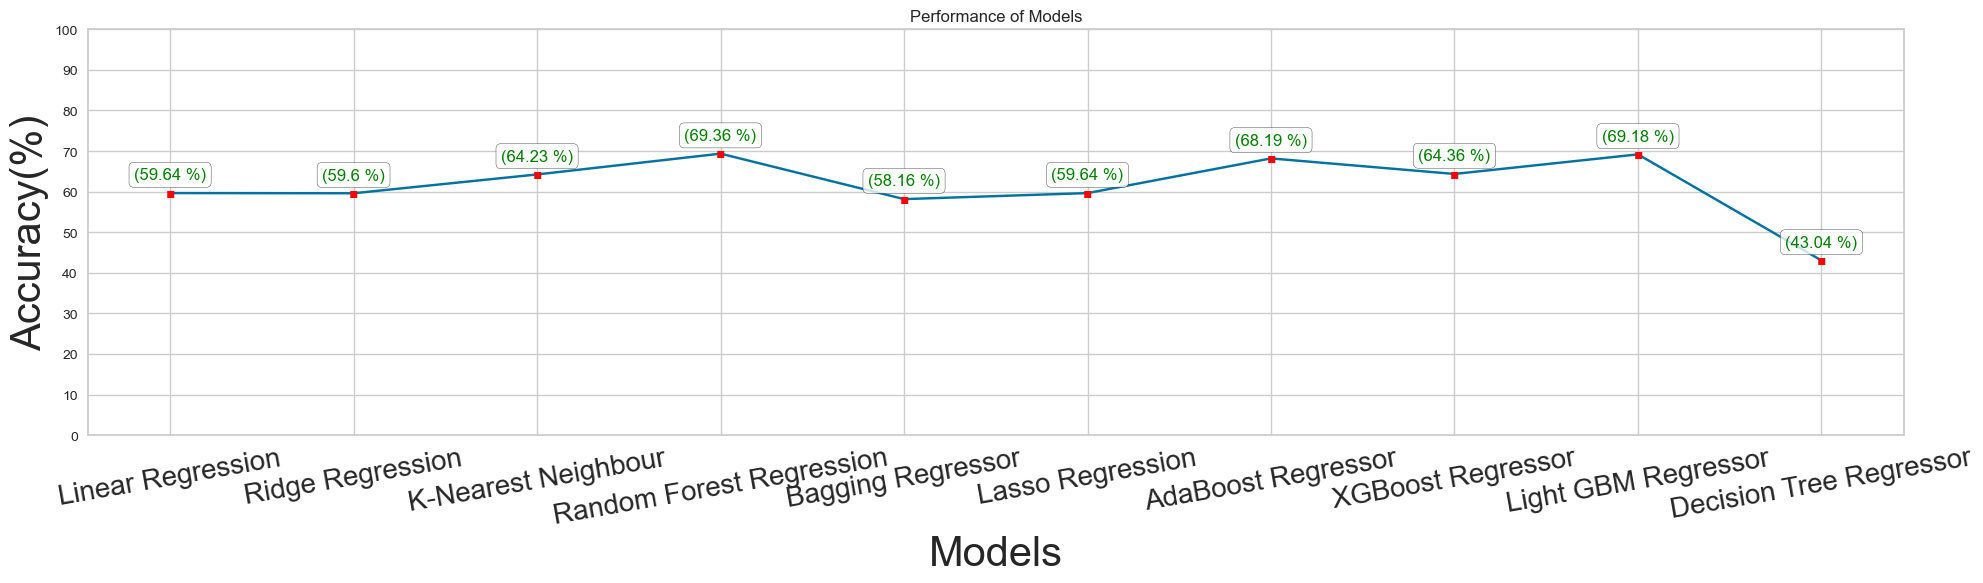

In [78]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()

# **Final Model Analysis**

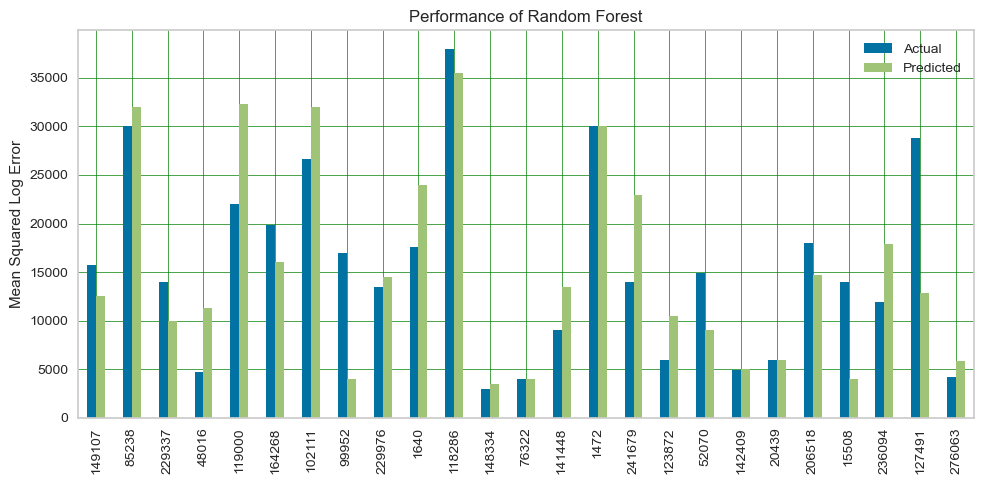

In [79]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()